In [16]:
import pandas as pd
import os
import numpy as np
import sklearn as linear_model
import matplotlib.pyplot as plt

In [17]:
os.chdir('E:/PythonImaricusData/DAY6')
df=pd.read_csv('advertising.csv')

In [18]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [20]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [21]:
df["TV"]=df["TV"].fillna(df["TV"].mean())

In [27]:
for x in df : 
    if df[x].dtypes == "int64" :
        df[x]=df[x].astype(float)
        print(df[x].dtypes)

In [34]:
x=df.drop('Sales',axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [35]:
y=df["Sales"]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [37]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [40]:
from sklearn.svm import SVR
svr= SVR(kernel="linear",C=1000)

In [41]:
from sklearn.preprocessing import StandardScaler

In [45]:
x_train.dtypes

TV           float64
Radio        float64
Newspaper    float64
dtype: object

In [43]:
scaler=StandardScaler()

In [49]:
x_trainstd=scaler.fit_transform(x_train)
x_trainstd

array([[-1.34155345,  1.0355176 ,  1.65941078],
       [-1.4053143 ,  0.08249594, -1.30629738],
       [-0.08995151,  0.40243892, -0.81980897],
       [ 0.69761311, -0.18979597, -0.90868666],
       [ 0.76609699,  0.01442296,  1.28518893],
       [-0.56461564,  0.42286082, -1.01627544],
       [-1.67570755, -1.44914602, -1.36243065],
       [-1.57770476,  1.38268978,  2.77272078],
       [-0.29304164,  0.91979354,  2.29558792],
       [-0.54218127, -1.20408331,  0.19994556],
       [-0.48078193, -0.61865571,  0.07364569],
       [ 0.93258366,  0.60665785,  2.06169926],
       [ 1.2195075 , -0.14214488, -0.00587645],
       [ 0.40596624, -0.16256678, -0.3800983 ],
       [-1.24945444,  0.16418351, -0.44558712],
       [-1.04164129, -0.73437977, -0.55317591],
       [ 1.68118331,  0.33436595,  0.6115896 ],
       [ 0.25955243, -0.35997841,  0.02686796],
       [ 0.61377939, -0.07407191,  0.06896792],
       [-1.69105739,  0.32075135,  0.52738968],
       [ 1.35411375, -1.39468764,  0.602

In [51]:
x_teststd=scaler.fit_transform(x_test)
x_teststd

array([[-0.72685844, -0.14851009, -0.60786277],
       [-0.9451206 , -0.73141627, -0.60351079],
       [-0.48586065, -1.47151064, -0.39461576],
       [ 1.77974598,  1.27928259,  0.82393857],
       [ 0.42129143, -0.98029756,  0.12762181],
       [-0.87464011, -1.11783722, -0.11173708],
       [-1.41461158,  1.71155009,  1.85970975],
       [ 1.21590208, -1.0130451 , -1.02565283],
       [-1.24295749,  0.80771803,  1.46367959],
       [ 0.73276971,  0.03487613, -0.78629394],
       [ 1.45689988,  1.30548062,  0.97625786],
       [-0.52223767, -0.71831725, -0.27711231],
       [ 0.26668907, -1.32087196, -1.04306075],
       [ 0.62136507, -0.10921304, -0.99083699],
       [-0.64501014,  0.25755939, -0.43378358],
       [-0.1470996 , -0.20745566, -0.89944542],
       [ 1.5057815 , -0.18125762, -1.39121913],
       [-1.50555415,  1.10244588, -1.02565283],
       [-0.66433543,  1.74429763,  0.58457968],
       [ 0.91238127,  0.12001973, -0.83416572],
       [ 1.75587355,  1.32512914,  1.720

In [54]:
svr.fit(x_trainstd,y_train)

SVR(C=1000, kernel='linear')

In [56]:
y_trainpred = svr.predict(x_trainstd)
y_trainpred

array([11.22161997,  9.11510954, 15.52609228, 17.97356879, 18.75038365,
       13.44916039,  5.23567896, 10.84198023, 15.69668425, 10.76740261,
       12.0565771 , 20.56475131, 20.41619128, 16.75754841,  9.99390549,
        9.33695324, 23.32707917, 15.78539327, 17.8565206 ,  8.36352723,
       18.85383358, 15.29815756, 16.67065267, 15.12936939, 18.31175762,
       20.0528547 , 21.73961218, 17.48343077, 10.93572252, 11.837406  ,
       19.43373957, 12.1630437 , 22.43538722, 24.6057166 , 11.422762  ,
       16.09403998, 21.10585031, 19.23797149, 19.1344603 , 19.06517938,
       17.98913259, 10.49150431,  9.91666331,  7.00583903,  5.3296086 ,
       18.96066209, 11.06975569, 19.08727936, 10.53868614, 14.91269766,
       16.41874612,  8.7406777 , 16.61542075, 12.05661478, 10.06306286,
       19.33591438, 24.93959063,  9.69837008, 22.17920254, 15.56107746,
        9.65079975,  9.78242017, 15.43676038, 21.23857261, 11.84376462,
       17.45794987, 16.96669215, 16.55679289, 16.01515466, 17.86

In [55]:
y_testpred=svr.predict(x_teststd)
y_testpred

array([11.75290494,  9.76694708, 10.51757387, 25.42756405, 15.422092  ,
        9.42930279, 12.09108584, 18.82290982, 11.24948069, 18.52872463,
       24.05161247, 11.68006443, 14.07962558, 17.77246249, 12.83486598,
       14.2020335 , 21.54220594, 10.46997821, 15.40364432, 19.47058603,
       25.44955628, 13.18040018, 17.34419677, 14.69662751,  8.85036532,
       16.06819422, 15.40190488, 21.41102685, 17.46693321, 10.18597693,
       13.74755743, 21.68971286, 21.68834572, 22.45372812,  8.47875814,
        8.2599063 , 10.35309108, 16.35296191, 14.5018403 ,  8.46561852])

In [58]:
y_test.tail()

189     6.7
129     9.7
4      17.9
83     13.6
106     7.2
Name: Sales, dtype: float64

In [61]:
print("""Actual:\t \t\tpredicted""")
for x, y in zip(y_test,y_testpred):
    print(x, y, sep='\t\t')

Actual:	 		predicted
11.3		11.752904943443044
8.4		9.766947082396344
12.0		10.517573873937552
25.4		25.427564052864824
16.7		15.422091995347701
8.7		9.429302791826474
7.2		12.0910858389166
18.2		18.822909822632624
9.2		11.249480688983711
16.6		18.52872463496547
24.2		24.051612472282073
10.6		11.680064425647204
15.5		14.079625582366278
20.6		17.772462485097236
11.8		12.834865977143098
13.2		14.202033497679425
17.4		21.54220594313088
1.6		10.469978211143287
14.7		15.403644324567866
17.0		19.470586031657746
26.2		25.449556276647314
10.3		13.180400182926208
16.1		17.34419677100564
12.9		14.696627508616357
8.1		8.850365317997019
15.2		16.0681942225481
17.6		15.401904879995248
22.6		21.41102684658418
16.6		17.466933214466422
8.5		10.185976932780394
12.5		13.747557432422044
23.7		21.68971286409615
16.1		21.68834571851258
21.8		22.45372812264023
5.6		8.478758136309269
6.7		8.259906299180246
9.7		10.353091080651582
17.9		16.35296191042599
13.6		14.501840299584758
7.2		8.465618518002346


In [63]:
from sklearn import metrics

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_testpred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_testpred)))

Mean Squared Error: 5.809485549170392
Root Mean Squared Error: 2.4102874411925215


In [64]:
from sklearn.metrics import r2_score
r2_score(y_train,y_trainpred)

0.9110882352040719

In [65]:
r2_score(y_test,y_testpred)

0.8259491837710837

C:\Users\RAHUL GOPI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL GOPI\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\RAHUL GOPI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


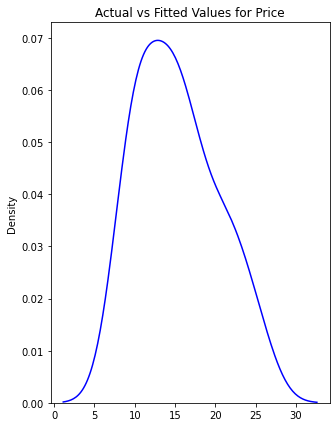

In [66]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_testpred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [67]:
mlr_diff=pd.DataFrame({'Actual value':y_test,'Predicted value':y_testpred})
mlr_diff.head()

,Actual value,Predicted value
18,11.3,11.752905
170,8.4,9.766947
107,12.0,10.517574
98,25.4,25.427564
177,16.7,15.422092


In [60]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [61]:
df.duplicated().any()

False

In [62]:
import seaborn as sns

C:\Users\RAHUL GOPI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


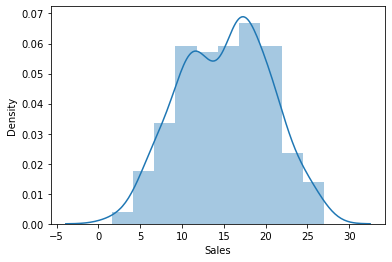

In [63]:
sns.distplot(df['Sales']);

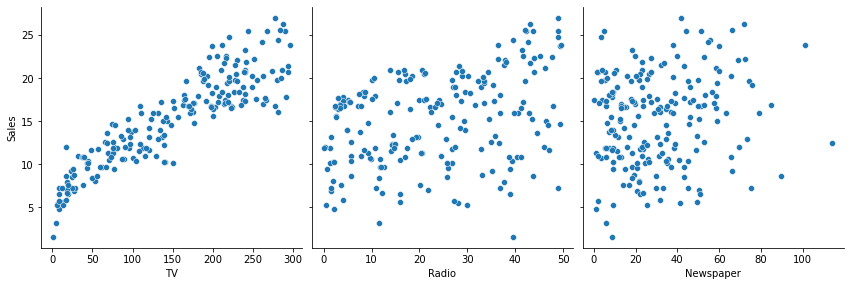

In [64]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],height=4,aspect=1,kind='scatter')
df1=plt.show()

<AxesSubplot:>

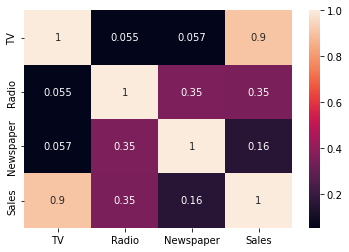

In [65]:
sns.heatmap(df.corr(),annot=True)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [67]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [68]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=100)

In [74]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [70]:
y_pred_reg= mlr.predict(x_test)
y_pred_reg

array([ 9.35221067, 20.96344625, 16.48851064, 20.10971005, 21.67148354,
       16.16054424, 13.5618056 , 15.39338129, 20.81980757, 21.00537077,
       12.29451311, 20.70848608,  8.17367308, 16.82471534, 10.48954832,
        9.99530649, 16.34698901, 14.5758119 , 17.23065133, 12.56890735,
       18.55715915, 12.12402775, 20.43312609, 17.78017811, 16.73623408,
       21.60387629, 20.13532087, 10.82559967, 19.12782848, 14.84537816,
       13.13597397,  9.07757918, 12.07834143, 16.62824427,  8.41792841,
       14.0456697 ,  9.92050209, 14.26101605, 16.76262961, 17.17185467,
       18.88797595, 15.50165469, 15.78688377, 16.86266686, 13.03405813,
       10.47673934, 10.6141644 , 20.85264977, 10.1517568 ,  6.88471443,
       17.88702583, 18.16013938, 12.55907083, 16.28189561, 18.98024679,
       11.33714913,  5.91026916, 10.06159509, 17.62383031, 13.19628335])

In [75]:
mlr_diff=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred_reg})
mlr_diff.head()

,Actual value,Predicted value
126,6.6,9.352211
104,20.7,20.963446
99,17.2,16.488511
92,19.4,20.109710
111,21.8,21.671484


In [72]:
mlr.predict([[56,55,67]])

C:\Users\RAHUL GOPI\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.82112602])